In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:
column_names = ['userId', 'movieId', 'rating' ,'timestamp']
df = pd.read_csv('u.data', sep="\t", names=column_names)

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
movie_titles.rename(columns={'item_id':'movieId'}, inplace=True)

In [6]:
movie_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_titles,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df = df.drop(['timestamp'],axis=1)

In [9]:
df = df.sort_values(by='movieId',ascending=True)

In [10]:
df.index = range(0,df.shape[0])

In [11]:
df.head()

,userId,movieId,rating,title
0,610,1,4,Toy Story (1995)
1,204,1,2,Toy Story (1995)
2,247,1,4,Toy Story (1995)
3,45,1,5,Toy Story (1995)
4,64,1,4,Toy Story (1995)


In [12]:
combine_movie_rating = df.dropna(axis=0, subset=['title'])
movie_ratingCount = combine_movie_rating.groupby(['title'])['rating'].count().reset_index().rename(columns={'rating':'totalRatingCount'})[['title','totalRatingCount']]
movie_ratingCount.head()

,title,totalRatingCount
0,'Til There Was You (1997),9
1,1-900 (1994),5
2,101 Dalmatians (1996),109
3,12 Angry Men (1957),125
4,187 (1997),41


In [13]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on='title', right_on='title', how='left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,610,1,4,Toy Story (1995),452
1,204,1,2,Toy Story (1995),452
2,247,1,4,Toy Story (1995),452
3,45,1,5,Toy Story (1995),452
4,64,1,4,Toy Story (1995),452


In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   1664.000
mean      60.098
std       80.963
min        1.000
25%        7.000
50%       27.000
75%       80.250
max      584.000
Name: totalRatingCount, dtype: float64


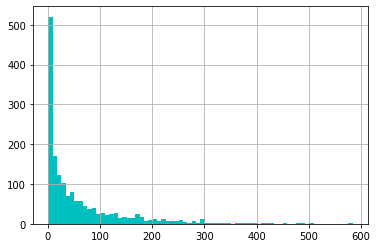

In [15]:
movie_ratingCount['totalRatingCount'].hist(color='c',bins=70)

In [16]:
popularity_threshold = 100
rating_popular_movie = rating_with_totalRatingCount[rating_with_totalRatingCount['totalRatingCount'] >= popularity_threshold]
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,610,1,4,Toy Story (1995),452
1,204,1,2,Toy Story (1995),452
2,247,1,4,Toy Story (1995),452
3,45,1,5,Toy Story (1995),452
4,64,1,4,Toy Story (1995),452


In [17]:
rating_popular_movie.shape

(65011, 5)

In [18]:
# Pivot matrix for userId and movietitle

movie_features_df = rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),0.000,2.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,...,2.000,0.000,0.000,2.000,4.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,5.000,0.000,0.000,0.000,0.000,4.000,4.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,4.000,0.000,0.000,0.000,4.000,5.000,5.000,0.000,0.000,...,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000
Absolute Power (1997),0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
"Abyss, The (1989)",0.000,3.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000


In [19]:
from scipy.sparse import  csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [20]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [21]:
movie_features_df.shape

(338, 944)

In [22]:
# testing 
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

99


In [23]:
distances

array([[0.        , 0.17719374, 0.22238144, 0.24654239, 0.24955008,
        0.25750243]])

In [24]:
indices.flatten()[1]

247

In [25]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendations for {0}:\n".format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Empire Strikes Back, The (1980):

1: Raiders of the Lost Ark (1981), with distance of 0.17719373557114648
2: Indiana Jones and the Last Crusade (1989), with distance of 0.22238144278299532
3: Back to the Future (1985), with distance of 0.24654238838999842
4: Star Wars (1977), with distance of 0.24955008270687218
5: Terminator, The (1984), with distance of 0.2575024254645971


In [26]:
def movie_recommender():
    str_ = input('Input the movie you would like to search for: ')
    list_ = list(movie_features_df.index)
    j = 1
    for i in range(0, len(list_)):
        if str_.lower() in list_[i].lower():
            j+=1
    if j == 1:
        print("There are no related searches")
    elif j == 2:
        k = 1
        print('The only related search found is \n')
        for i in range(0, len(list_)):
            if str_.lower() in list_[i].lower():
                print(str(k) + '.' + '\t' + list_[i] + '\n')
                query_index = i
        distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 9)
        for i in range(0, len(distances.flatten())):
            if i == 0:
                print("Recommendations for {0}:\n".format(movie_features_df.index[query_index]))
            else:
                print('{0}: {1}, with distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))
    else:
        k = 1
        print("The movies with the search term are: \n")
        for i in range(0, len(list_)):
            if str_.lower() in list_[i].lower():
                print(str(k) + '.' + '\t' + list_[i] + '\n')
                k+=1
        str__ = input('Enter the name of the movie you want to search for from the ones above: ')
        m = 0
        for i in range(0, len(list_)):
            if str__.lower() in list_[i].lower():
                m+=1
        while m == 0:
            str__ = input('Not found!....... \nEnter the name of the movie again: ')
            m = 0
            for i in range(0, len(list_)):
                if str__.lower() in list_[i].lower():
                    m+=1
        for i in range(0, len(list_)):
            if str__.lower() in list_[i].lower():
                query_index = i
        distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 9)
        for i in range(0, len(distances.flatten())):
            if i == 0:
                print("Recommendations for {0}:\n".format(movie_features_df.index[query_index]))
            else:
                print('{0}: {1}, with distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

In [27]:
movie_recommender()

Input the movie you would like to search for: star
The movies with the search term are: 

1.	Lone Star (1996)

2.	Star Trek III: The Search for Spock (1984)

3.	Star Trek IV: The Voyage Home (1986)

4.	Star Trek VI: The Undiscovered Country (1991)

5.	Star Trek: First Contact (1996)

6.	Star Trek: Generations (1994)

7.	Star Trek: The Motion Picture (1979)

8.	Star Trek: The Wrath of Khan (1982)

9.	Star Wars (1977)

10.	Stargate (1994)

11.	Starship Troopers (1997)

Enter the name of the movie you want to search for from the ones above: star gate
Not found!....... 
Enter the name of the movie again: stargate
Recommendations for Stargate (1994):

1: True Lies (1994), with distance of 0.35201253850810355
2: Crow, The (1994), with distance of 0.36772688838153256
3: Star Trek VI: The Undiscovered Country (1991), with distance of 0.36900838203667974
4: Die Hard 2 (1990), with distance of 0.3693442338798627
5: Batman (1989), with distance of 0.37267311657934876
6: Star Trek III: The Search 

In [28]:
movie_recommender()

Input the movie you would like to search for: journey to mars
There are no related searches


In [29]:
movie_recommender()

Input the movie you would like to search for: star trek iii
The only related search found is 

1.	Star Trek III: The Search for Spock (1984)

Recommendations for Star Trek III: The Search for Spock (1984):

1: Star Trek: The Wrath of Khan (1982), with distance of 0.20530240218666307
2: Star Trek IV: The Voyage Home (1986), with distance of 0.22239820271578048
3: Star Trek VI: The Undiscovered Country (1991), with distance of 0.23522917021390355
4: Star Trek: The Motion Picture (1979), with distance of 0.2831585051633341
5: Star Trek: Generations (1994), with distance of 0.34775230063455986
6: Batman (1989), with distance of 0.3657263114664413
7: Die Hard 2 (1990), with distance of 0.3688373130173296
8: Top Gun (1986), with distance of 0.3729082527757037
